In [1]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.ml.feature import *
from pyspark.ml.regression import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spark = SparkSession.builder.appName("Venezuelan Economy Analyser").getOrCreate()

In [3]:
df = spark.read.csv(r"C:\Users\amith\Documents\GitHub\misc\Venezuela Resource Dependency & Economy(1960-2023)\venezuela_wdi_indicators.csv",header=True,inferSchema=True)

In [4]:
df.show()

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+-------------------+-----------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|    gdp_current_usd|   gdp_growth_pct|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+-------------------+-----------------+
|         VEN|1960|             NULL|                                NULL|                          NULL|                                     NULL| 7.66393830307171E9|             NULL|
|         VEN|1961|             NULL|                                NULL|                          NULL|                                     NULL| 8.06726703061862E9| 3.19251943889351|
|         VEN|1962|             NULL|                                N

In [5]:
df.printSchema()

root
 |-- country_iso3: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- oil_rents_pct_gdp: double (nullable = true)
 |-- total_natural_resource_rents_pct_gdp: double (nullable = true)
 |-- fuel_exports_pct_merch_exports: double (nullable = true)
 |-- ores_and_metals_exports_pct_merch_exports: double (nullable = true)
 |-- gdp_current_usd: double (nullable = true)
 |-- gdp_growth_pct: double (nullable = true)



In [6]:
df_description = df.describe()
df_count = df_description.filter(col("summary") == "count")

df_count_null = pd.DataFrame(columns=df_count.columns[1:])
for i in df.columns:
    df_count_null.loc[0,i] = df.count() - int(df_count.select(i).first()[0])
    df_count_null.loc[1,i] = np.round(((df.count() - int(df_count.select(i).first()[0]))/df.count())*100,2)

df_count_null.to_csv(r"C:\Users\amith\Documents\GitHub\misc\Venezuela Resource Dependency & Economy(1960-2023)\amith.csv",index=False)
df_count_null = spark.read.csv(r"C:\Users\amith\Documents\GitHub\misc\Venezuela Resource Dependency & Economy(1960-2023)\amith.csv",header=True,inferSchema=True)

#df_count_null = spark.createDataFrame(df_count_null)
df_count_null.show()

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------+--------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|gdp_current_usd|gdp_growth_pct|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------+--------------+
|         0.0| 0.0|             20.0|                                20.0|                          16.0|                                     16.0|            0.0|           1.0|
|         0.0| 0.0|            30.77|                               30.77|                         24.62|                                    24.62|            0.0|          1.54|
+------------+----+-----------------+------------------------------------+------------------------------+

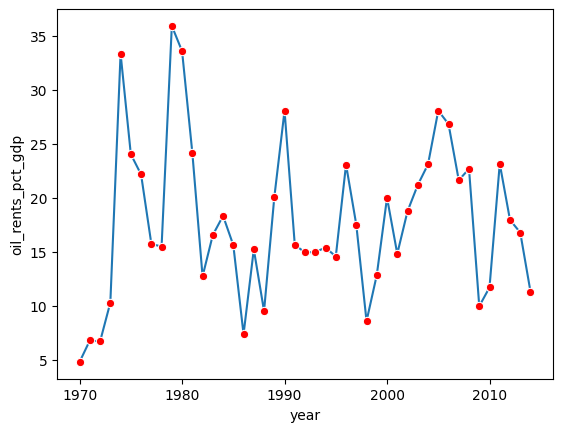

In [7]:
df_pd = df.toPandas()
ax = sns.lineplot(x=df_pd["year"],y=df_pd["oil_rents_pct_gdp"],marker="o")
ax.lines[0].set_markerfacecolor("red")

In [8]:
df.agg(percentile_approx(col("oil_rents_pct_gdp"),[0.1])).first()[0][0]

8.57137562243914

In [9]:
df.printSchema()

root
 |-- country_iso3: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- oil_rents_pct_gdp: double (nullable = true)
 |-- total_natural_resource_rents_pct_gdp: double (nullable = true)
 |-- fuel_exports_pct_merch_exports: double (nullable = true)
 |-- ores_and_metals_exports_pct_merch_exports: double (nullable = true)
 |-- gdp_current_usd: double (nullable = true)
 |-- gdp_growth_pct: double (nullable = true)



In [10]:
df_proper = df.filter((col("year")>=1970) & (col("year")<=2014))
df_proper.show(df_proper.count())

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+-------------------+------------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|    gdp_current_usd|    gdp_growth_pct|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+-------------------+------------------+
|         VEN|1970| 4.79927244945126|                    5.48772130601331|              91.0159714248327|                         5.80784544796093|1.15611111111111E10|  7.71191438124387|
|         VEN|1971| 6.78719222962612|                    7.38794104909662|              91.5238450151192|                         5.50373167972084|1.29865909090909E10|  1.47929120998987|
|         VEN|1972| 6.69174635347221|                    7.192719

In [11]:
print(len(df_proper.columns[2:]))

6


In [12]:
print("oil_rents_pct_gdp :  ",df_proper.agg(sum(when(col("oil_rents_pct_gdp").isNull(),1).otherwise(0))).first()[0])
print()
print("total_natural_resource_rents_pct_gdp :  ",df_proper.agg(sum(when(col("total_natural_resource_rents_pct_gdp").isNull(),1).otherwise(0))).first()[0])
print()
print("fuel_exports_pct_merch_exports :  ",df_proper.agg(sum(when(col("fuel_exports_pct_merch_exports").isNull(),1).otherwise(0))).first()[0])
print()
print("ores_and_metals_exports_pct_merch_exports :  ",df_proper.agg(sum(when(col("ores_and_metals_exports_pct_merch_exports").isNull(),1).otherwise(0))).first()[0])
print()
print("gdp_current_usd :  ",df_proper.agg(sum(when(col("gdp_current_usd").isNull(),1).otherwise(0))).first()[0])
print()
print("gdp_growth_pct :  ",df_proper.agg(sum(when(col("gdp_growth_pct").isNull(),1).otherwise(0))).first()[0])

oil_rents_pct_gdp :   0

total_natural_resource_rents_pct_gdp :   0

fuel_exports_pct_merch_exports :   4

ores_and_metals_exports_pct_merch_exports :   4

gdp_current_usd :   0

gdp_growth_pct :   0


In [13]:
df_proper_1 = df_proper.withColumn("fuel_exports_pct_merch_exports",when(col("fuel_exports_pct_merch_exports").isNull(),df_proper.agg(median(col("fuel_exports_pct_merch_exports"))).first()[0]).otherwise(col("fuel_exports_pct_merch_exports")))

df_proper_1 = df_proper_1.withColumn("ores_and_metals_exports_pct_merch_exports",when(col("ores_and_metals_exports_pct_merch_exports").isNull(),df_proper_1.agg(median(col("ores_and_metals_exports_pct_merch_exports"))).first()[0]).otherwise(col("ores_and_metals_exports_pct_merch_exports")))


df_proper_1.show(df_proper_1.count())

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+-------------------+------------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|    gdp_current_usd|    gdp_growth_pct|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+-------------------+------------------+
|         VEN|1970| 4.79927244945126|                    5.48772130601331|              91.0159714248327|                         5.80784544796093|1.15611111111111E10|  7.71191438124387|
|         VEN|1971| 6.78719222962612|                    7.38794104909662|              91.5238450151192|                         5.50373167972084|1.29865909090909E10|  1.47929120998987|
|         VEN|1972| 6.69174635347221|                    7.192719

In [14]:
print("oil_rents_pct_gdp :  ",df_proper_1.agg(sum(when(col("oil_rents_pct_gdp").isNull(),1).otherwise(0))).first()[0])
print()
print("total_natural_resource_rents_pct_gdp :  ",df_proper_1.agg(sum(when(col("total_natural_resource_rents_pct_gdp").isNull(),1).otherwise(0))).first()[0])
print()
print("fuel_exports_pct_merch_exports :  ",df_proper_1.agg(sum(when(col("fuel_exports_pct_merch_exports").isNull(),1).otherwise(0))).first()[0])
print()
print("ores_and_metals_exports_pct_merch_exports :  ",df_proper_1.agg(sum(when(col("ores_and_metals_exports_pct_merch_exports").isNull(),1).otherwise(0))).first()[0])
print()
print("gdp_current_usd :  ",df_proper_1.agg(sum(when(col("gdp_current_usd").isNull(),1).otherwise(0))).first()[0])
print()
print("gdp_growth_pct :  ",df_proper_1.agg(sum(when(col("gdp_growth_pct").isNull(),1).otherwise(0))).first()[0])

oil_rents_pct_gdp :   0

total_natural_resource_rents_pct_gdp :   0

fuel_exports_pct_merch_exports :   0

ores_and_metals_exports_pct_merch_exports :   0

gdp_current_usd :   0

gdp_growth_pct :   0


In [15]:
df_proper_1.show(df_proper_1.count())

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+-------------------+------------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|    gdp_current_usd|    gdp_growth_pct|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+-------------------+------------------+
|         VEN|1970| 4.79927244945126|                    5.48772130601331|              91.0159714248327|                         5.80784544796093|1.15611111111111E10|  7.71191438124387|
|         VEN|1971| 6.78719222962612|                    7.38794104909662|              91.5238450151192|                         5.50373167972084|1.29865909090909E10|  1.47929120998987|
|         VEN|1972| 6.69174635347221|                    7.192719

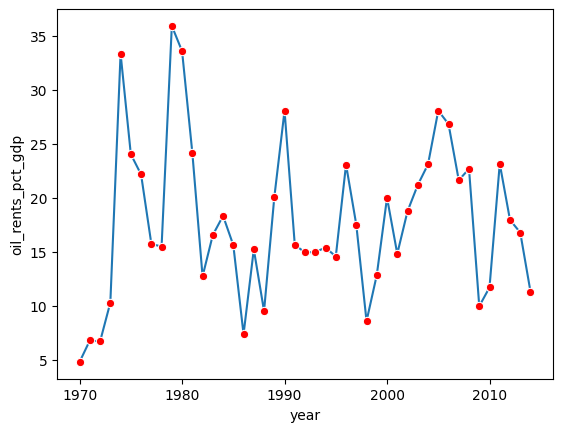

In [16]:
df_proper_pd = df_proper_1.toPandas()

ax = sns.lineplot(x=df_proper_pd["year"],y=df_proper_pd["oil_rents_pct_gdp"],marker="o")
ax.lines[0].set_markerfacecolor("red")

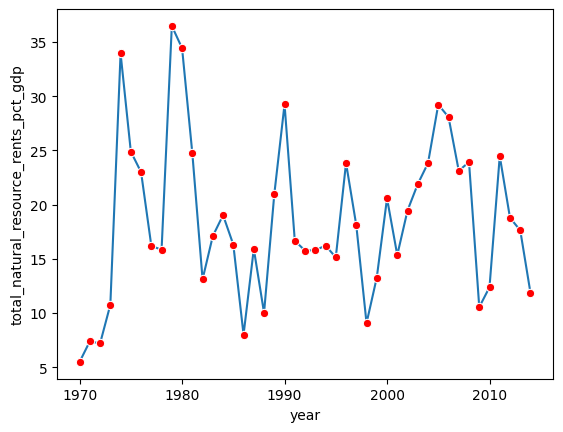

In [17]:
ax = sns.lineplot(x=df_proper_pd["year"],y=df_proper_pd["total_natural_resource_rents_pct_gdp"],marker="o")
ax.lines[0].set_markerfacecolor("red")
ax.lines[0].set_markerfacecolor("red")

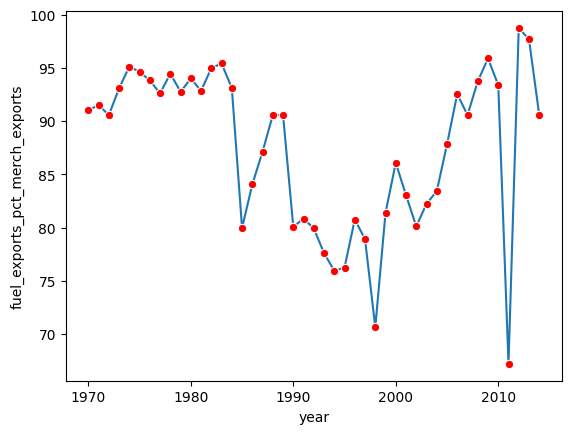

In [18]:
ax = sns.lineplot(x=df_proper_pd["year"],y=df_proper_pd["fuel_exports_pct_merch_exports"],marker="o")
ax.lines[0].set_markerfacecolor("red")

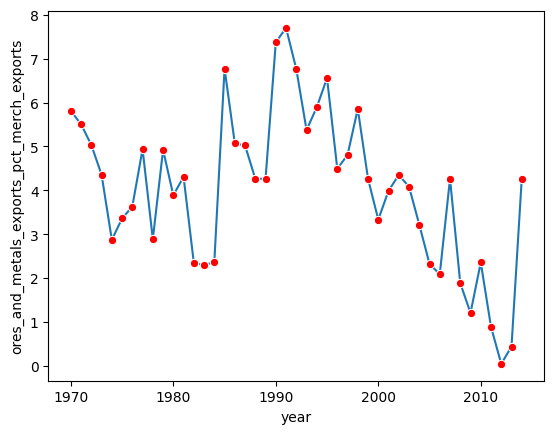

In [19]:
ax = sns.lineplot(x=df_proper_pd["year"],y=df_proper_pd["ores_and_metals_exports_pct_merch_exports"],marker="o")
ax.lines[0].set_markerfacecolor("red")

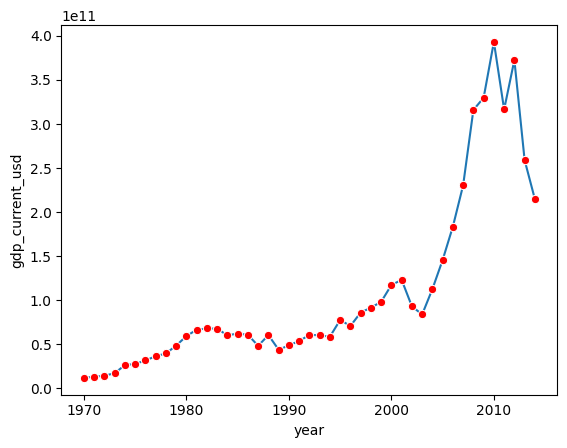

In [20]:
ax = sns.lineplot(x=df_proper_pd["year"],y=df_proper_pd["gdp_current_usd"],marker="o")
ax.lines[0].set_markerfacecolor("red")

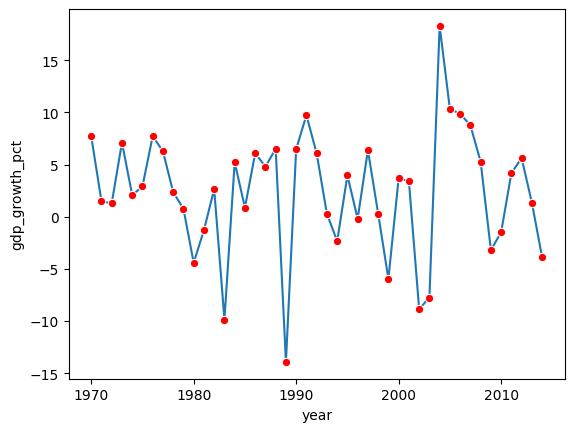

In [21]:
ax = sns.lineplot(x=df_proper_pd["year"],y=df_proper_pd["gdp_growth_pct"],marker="o")
ax.lines[0].set_markerfacecolor("red")

In [22]:
power(10,10)

Column<'POWER(10, 10)'>

In [23]:
df_proper_2 = df_proper_1

colus = df_proper_1.columns[2:]

for i in colus:
    r = round(col(i),2)
    df_proper_2 = df_proper_2.withColumn(i,r)

s = round(col("gdp_current_usd")/power(10,9),2)
df_proper_2 = df_proper_2.withColumn("gdp_current_usd",s)
df_proper_2 = df_proper_2.withColumnRenamed(existing="gdp_current_usd",new="gdp_current_per_billion_usd")

In [24]:
df_proper_2.show()

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|gdp_current_per_billion_usd|gdp_growth_pct|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+
|         VEN|1970|              4.8|                                5.49|                         91.02|                                     5.81|                      11.56|          7.71|
|         VEN|1971|             6.79|                                7.39|                         91.52|                                      5.5|                      12.99|          1.48|
|         VEN|1972|             6.69|        

In [25]:
df_proper_2.toPandas().to_csv("venezuela_economy.csv",index=False)

In [26]:
df.agg(sum(when(col("oil_rents_pct_gdp")>col("total_natural_resource_rents_pct_gdp"),1).otherwise(0))).show()

+-------------------------------------------------------------------------------------------+
|sum(CASE WHEN (oil_rents_pct_gdp > total_natural_resource_rents_pct_gdp) THEN 1 ELSE 0 END)|
+-------------------------------------------------------------------------------------------+
|                                                                                          0|
+-------------------------------------------------------------------------------------------+



In [27]:
df.agg(sum(when(col("fuel_exports_pct_merch_exports")+col("ores_and_metals_exports_pct_merch_exports")>=100,1).otherwise(0))).show()

+----------------------------------------------------------------------------------------------------------------------+
|sum(CASE WHEN ((fuel_exports_pct_merch_exports + ores_and_metals_exports_pct_merch_exports) >= 100) THEN 1 ELSE 0 END)|
+----------------------------------------------------------------------------------------------------------------------+
|                                                                                                                     0|
+----------------------------------------------------------------------------------------------------------------------+



**1. Trend Analysis**

How has oil rents (% of GDP) changed over time, and during which years did Venezuela experience the sharpest increase or decline?

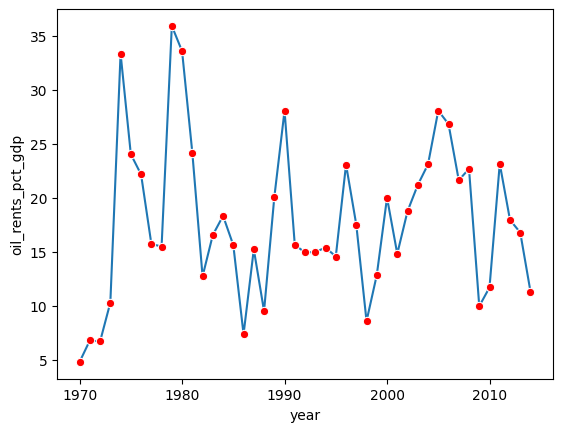

In [28]:
ax = sns.lineplot(x=df_proper_pd["year"],y=df_proper_pd["oil_rents_pct_gdp"],marker="o")
ax.lines[0].set_markerfacecolor("red")

In [29]:
from pyspark.sql.window import Window

In [30]:
window_func = Window.orderBy("year")
df_proper_3 = df_proper_2.withColumn("oil_rents_pct_gdp_lag",lag(col("oil_rents_pct_gdp")).over(window_func))
df_proper_3 = df_proper_3.withColumn("oil_rents_lag_diff",round(col("oil_rents_pct_gdp_lag")-col("oil_rents_pct_gdp"),2))
df_proper_3.show(df_proper_3.count())

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+---------------------+------------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|gdp_current_per_billion_usd|gdp_growth_pct|oil_rents_pct_gdp_lag|oil_rents_lag_diff|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+---------------------+------------------+
|         VEN|1970|              4.8|                                5.49|                         91.02|                                     5.81|                      11.56|          7.71|                 NULL|              NULL|
|         VEN|1971|             6.79|                                7.3

In [31]:
df_proper_3.filter(col("oil_rents_lag_diff")<=-20).show()

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+---------------------+------------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|gdp_current_per_billion_usd|gdp_growth_pct|oil_rents_pct_gdp_lag|oil_rents_lag_diff|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+---------------------+------------------+
|         VEN|1974|            33.34|                               33.95|                         95.13|                                     2.87|                       26.1|          2.07|                10.29|            -23.05|
|         VEN|1979|             35.9|                               36.4

In [32]:
df_proper_3.filter(col("oil_rents_lag_diff")>=10).show()

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+---------------------+------------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|gdp_current_per_billion_usd|gdp_growth_pct|oil_rents_pct_gdp_lag|oil_rents_lag_diff|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+---------------------+------------------+
|         VEN|1982|            12.72|                               13.11|                         94.99|                                     2.35|                      67.74|          2.64|                24.18|             11.46|
|         VEN|1991|            15.63|                               16.6

***Oil rents experienced sharpest decline in % GDP in the years 1974 and 1979, and sharpest improvement in 1982, 1991 and 2009.***

**2. Contribution Comparison**

Compare oil rents (% of GDP) with total natural resource rents (% of GDP). In which years did oil contribute more than 80% of total natural resource rents?

In [33]:
df_proper_3 = df_proper_2.withColumn("pct_oil_out_of_natural_resources",col("oil_rents_pct_gdp")/col("total_natural_resource_rents_pct_gdp"))
df_proper_3.filter(col("pct_oil_out_of_natural_resources")>=0.80).select("year").show(df_proper_3.count())

+----+
|year|
+----+
|1970|
|1971|
|1972|
|1973|
|1974|
|1975|
|1976|
|1977|
|1978|
|1979|
|1980|
|1981|
|1982|
|1983|
|1984|
|1985|
|1986|
|1987|
|1988|
|1989|
|1990|
|1991|
|1992|
|1993|
|1994|
|1995|
|1996|
|1997|
|1998|
|1999|
|2000|
|2001|
|2002|
|2003|
|2004|
|2005|
|2006|
|2007|
|2008|
|2009|
|2010|
|2011|
|2012|
|2013|
|2014|
+----+



***Oil contributed more than 80% all the time, from 1970 to 2014***

**3. Volatility Measurement**

Which economic indicator in the dataset shows the highest year-over-year volatility, and how would you compute this using PySpark?

In [34]:
window_func = Window.orderBy("year")

lk = lag("oil_rents_pct_gdp").over(window_func)
df_proper_3 = df_proper_2.withColumn("oil_rents_lag_diff",round((col("oil_rents_pct_gdp")-lk)/lk,2))

lk = lag("total_natural_resource_rents_pct_gdp").over(window_func)
df_proper_3 = df_proper_3.withColumn("total_natural_resource_rents_lag_diff",round((col("total_natural_resource_rents_pct_gdp")-lk)/lk,2))

lk = lag("fuel_exports_pct_merch_exports").over(window_func)
df_proper_3 = df_proper_3.withColumn("fuel_exports_lag_diff",round((col("fuel_exports_pct_merch_exports")-lk)/lk,2))

lk = lag("ores_and_metals_exports_pct_merch_exports").over(window_func)
df_proper_3 = df_proper_3.withColumn("ores_and_metals_exports_lag_diff",round((col("ores_and_metals_exports_pct_merch_exports")-lk)/lk,2))

lk = lag("gdp_current_per_billion_usd").over(window_func)
df_proper_3 = df_proper_3.withColumn("gdp_current_lag_diff",round((col("gdp_current_per_billion_usd")-lk)/lk,2))

lk = lag("gdp_growth_pct").over(window_func)
df_proper_3 = df_proper_3.withColumn("gdp_growth_lag_diff",round((col("gdp_growth_pct")-lk)/lk,2))


df_proper_3.show()

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+------------------+-------------------------------------+---------------------+--------------------------------+--------------------+-------------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|gdp_current_per_billion_usd|gdp_growth_pct|oil_rents_lag_diff|total_natural_resource_rents_lag_diff|fuel_exports_lag_diff|ores_and_metals_exports_lag_diff|gdp_current_lag_diff|gdp_growth_lag_diff|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+------------------+-------------------------------------+---------------------+--------------------------------+----------

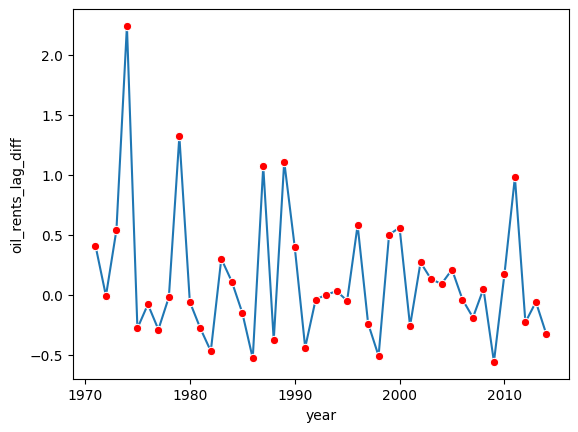

In [35]:
df_proper_pd_2 = df_proper_3.toPandas()

ax = sns.lineplot(x=df_proper_pd_2["year"],y=df_proper_pd_2["oil_rents_lag_diff"],marker="o")
ax.lines[0].set_markerfacecolor("red")

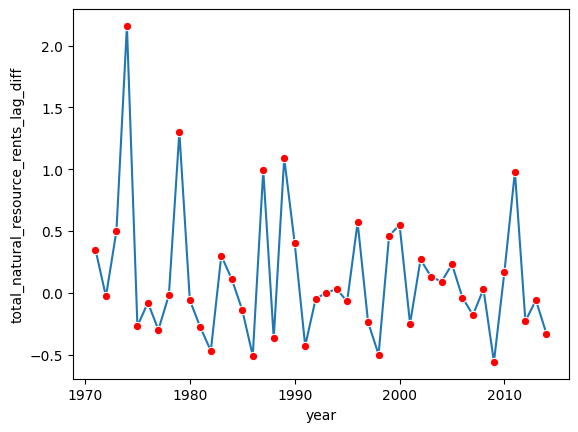

In [36]:
ax = sns.lineplot(x=df_proper_pd_2["year"],y=df_proper_pd_2["total_natural_resource_rents_lag_diff"],marker="o")
ax.lines[0].set_markerfacecolor("red")

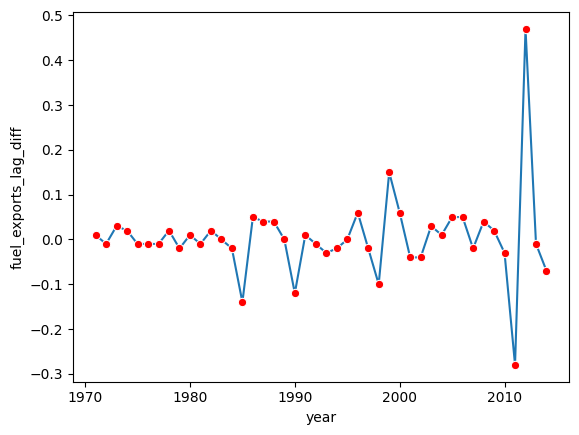

In [37]:
ax = sns.lineplot(x=df_proper_pd_2["year"],y=df_proper_pd_2["fuel_exports_lag_diff"],marker="o")
ax.lines[0].set_markerfacecolor("red")

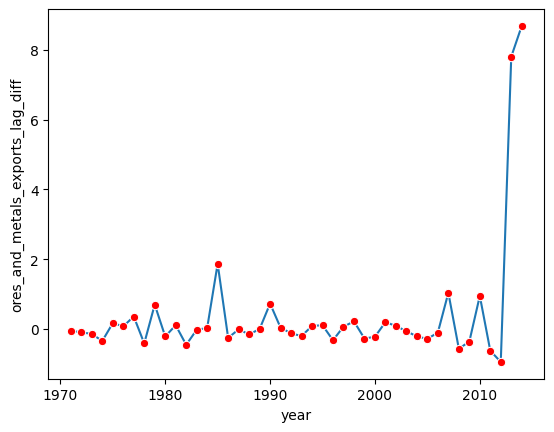

In [38]:
ax = sns.lineplot(x=df_proper_pd_2["year"],y=df_proper_pd_2["ores_and_metals_exports_lag_diff"],marker="o")
ax.lines[0].set_markerfacecolor("red")

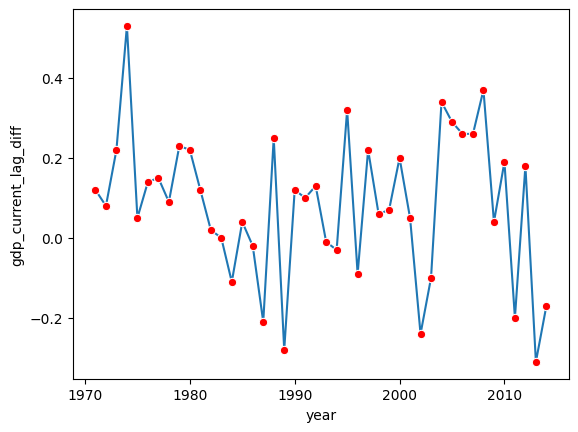

In [39]:
ax = sns.lineplot(x=df_proper_pd_2["year"],y=df_proper_pd_2["gdp_current_lag_diff"],marker="o")
ax.lines[0].set_markerfacecolor("red")

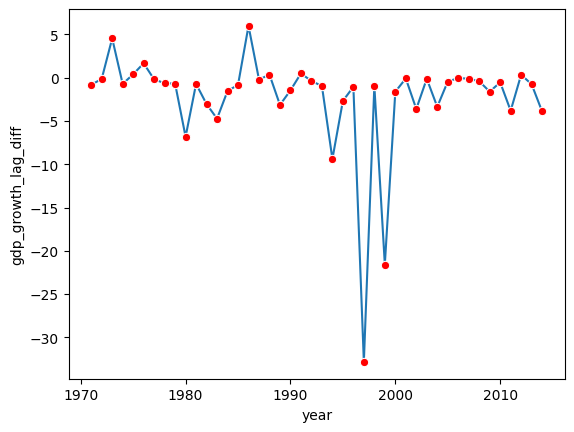

In [40]:
ax = sns.lineplot(x=df_proper_pd_2["year"],y=df_proper_pd_2["gdp_growth_lag_diff"],marker="o")
ax.lines[0].set_markerfacecolor("red")

***These two parameters show the highest year-to-year volatility: ores_and_metals_exports_lag_diff, gdp_growth_lag_diff***

**4. Pre vs Post Shock Analysis**

Split the data into pre-2014 and post-2014 periods.
How do the average oil rents and fuel exports differ between these two periods?

In [41]:
print("Average Oil Rents :  ",df_proper_3.agg(mean(col("oil_rents_pct_gdp"))).first()[0])

Average Oil Rents :   17.81288888888889


In [42]:
print("Average Fuel Exports :  ",df_proper_3.agg(mean(col("fuel_exports_lag_diff"))).first()[0])

Average Fuel Exports :   0.003863636363636361


**5. Correlation Study**

Is there a measurable relationship between oil rents (% of GDP) and fuel exports (% of merchandise exports) over time?
How would you compute this correlation in PySpark?

<Axes: xlabel='oil_rents_pct_gdp', ylabel='ores_and_metals_exports_pct_merch_exports'>

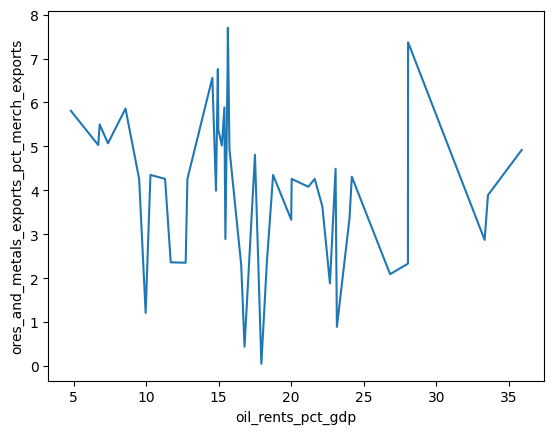

In [43]:
sns.lineplot(x=df_proper_pd_2["oil_rents_pct_gdp"],y=df_proper_pd_2["ores_and_metals_exports_pct_merch_exports"])

<Axes: xlabel='oil_rents_pct_gdp', ylabel='fuel_exports_pct_merch_exports'>

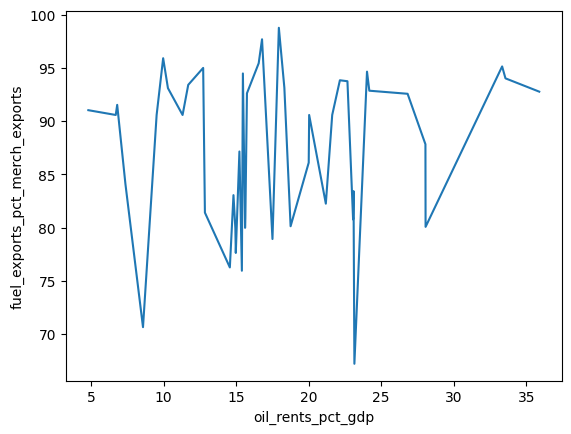

In [44]:
sns.lineplot(x=df_proper_pd_2["oil_rents_pct_gdp"],y=df_proper_pd_2["fuel_exports_pct_merch_exports"])

***By looking at the graphs, it sounds like there is no correlation between oil rents (% of GDP) and fuel exports (% of merchandise exports)***

**6. Peak Detection**

Identify the top 3 years in which Venezuela had the highest dependence on oil, considering a combined metric of:
- *oil rents (% of GDP)*
- *fuel exports (% of merchandise exports)*

In [45]:
df.agg(max(col("fuel_exports_pct_merch_exports"))).first()[0]

98.7637309978349

In [46]:
df_proper_4 = df_proper_3.orderBy(((col("oil_rents_pct_gdp") + col("fuel_exports_pct_merch_exports"))/2).desc())
df_proper_4_year = df_proper_4.select("year").first()[0]
df_proper_4_year

1979

**7. Rolling Statistics**

Compute a 5-year rolling average of oil rents (% of GDP).
What long-term trend does this rolling metric reveal that is not obvious from yearly values?

<Axes: xlabel='year', ylabel='oil_rents_lag_diff'>

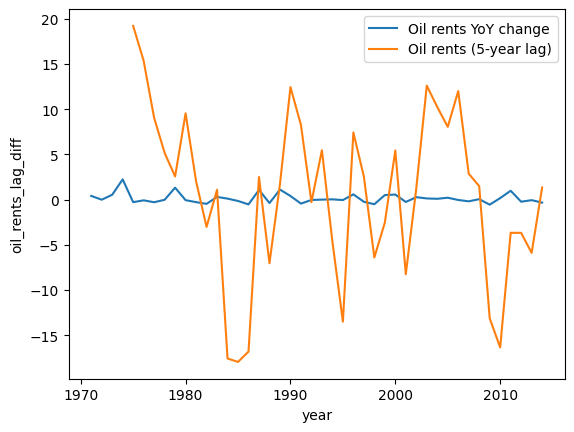

In [47]:
window_spec = Window.orderBy("year")

df_proper_5 = df_proper_3.withColumn("oil_rents_pct_gdp_lag_5",round(col("oil_rents_pct_gdp")-lag(col("oil_rents_pct_gdp"),5).over(window_spec),2))

df_p = df_proper_5.select("year","oil_rents_lag_diff","oil_rents_pct_gdp_lag_5")

df_ps = df_p.toPandas()

sns.lineplot(x=df_ps["year"],y=df_ps["oil_rents_lag_diff"],label="Oil rents YoY change")
sns.lineplot(x=df_ps["year"],y=df_ps["oil_rents_pct_gdp_lag_5"],label="Oil rents (5-year lag)")

***In the long term, there is a large difference in the oil rents in 5 years than it is in one year.***

**8. Structural Change Detection**

Using year-over-year percentage change, identify years of structural economic breaks where oil rents dropped or rose by more than a chosen threshold (e.g., ±20%).

In [48]:
df_po_6 = df_proper_3.filter((col("oil_rents_lag_diff") >= 0.20) | (col("oil_rents_lag_diff") <= -0.20))

df_po_6.show(df_po_6.count())

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+------------------+-------------------------------------+---------------------+--------------------------------+--------------------+-------------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|gdp_current_per_billion_usd|gdp_growth_pct|oil_rents_lag_diff|total_natural_resource_rents_lag_diff|fuel_exports_lag_diff|ores_and_metals_exports_lag_diff|gdp_current_lag_diff|gdp_growth_lag_diff|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+------------------+-------------------------------------+---------------------+--------------------------------+----------

In [49]:
print("The following are the years when oil rents dropped by more than 20% and less than -20%")
df_po_6.select("year").toPandas()["year"].to_numpy()

The following are the years when oil rents dropped by more than 20% and less than -20%


array([1971, 1973, 1974, 1975, 1977, 1979, 1981, 1982, 1983, 1986, 1987,
       1988, 1989, 1990, 1991, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2005, 2009, 2011, 2012, 2014], dtype=int32)

**9. Comparative Export Analysis**

Compare fuel exports vs ores and metals exports over time.
Did Venezuela ever diversify away from fuel exports based on this data?

In [50]:
df_proper_3.show()

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+------------------+-------------------------------------+---------------------+--------------------------------+--------------------+-------------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|gdp_current_per_billion_usd|gdp_growth_pct|oil_rents_lag_diff|total_natural_resource_rents_lag_diff|fuel_exports_lag_diff|ores_and_metals_exports_lag_diff|gdp_current_lag_diff|gdp_growth_lag_diff|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+------------------+-------------------------------------+---------------------+--------------------------------+----------

<Axes: xlabel='year', ylabel='fuel_exports_pct_merch_exports'>

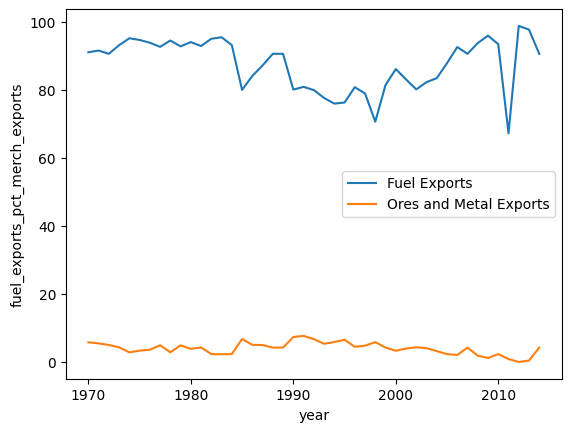

In [51]:
df_proper_3_pd = df_proper_3.toPandas()

sns.lineplot(x=df_proper_3_pd["year"],y=df_proper_3_pd["fuel_exports_pct_merch_exports"],label="Fuel Exports")
sns.lineplot(x=df_proper_3_pd["year"],y=df_proper_3_pd["ores_and_metals_exports_pct_merch_exports"],label="Ores and Metal Exports")

***No, Venezuela did not diversify enough from fuel exports based on this data***

**10. Outlier Identification**

Are there any outlier years where oil rents or export percentages deviate significantly from the historical mean?
How would you detect these using statistical methods in PySpark?

In [56]:
avg = df.agg(mean(col("oil_rents_pct_gdp"))).first()[0]
avg_1 = df.agg(mean(col("fuel_exports_pct_merch_exports"))).first()[0]
avg_2 = df.agg(mean(col("ores_and_metals_exports_pct_merch_exports"))).first()[0]

df_proper_6 = df_proper_3.withColumn("oil_rents_pct_gdp",round(col("oil_rents_pct_gdp")-avg,2))
df_proper_6 = df_proper_6.withColumn("fuel_exports_pct_merch_exports",round(col("fuel_exports_pct_merch_exports")-avg_1,2))
df_proper_6 = df_proper_6.withColumn("ores_and_metals_exports_pct_merch_exports",round(col("ores_and_metals_exports_pct_merch_exports")-avg_2,2))
df_proper_6.show()

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+------------------+-------------------------------------+---------------------+--------------------------------+--------------------+-------------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|gdp_current_per_billion_usd|gdp_growth_pct|oil_rents_lag_diff|total_natural_resource_rents_lag_diff|fuel_exports_lag_diff|ores_and_metals_exports_lag_diff|gdp_current_lag_diff|gdp_growth_lag_diff|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+------------------+-------------------------------------+---------------------+--------------------------------+----------

<Axes: xlabel='year', ylabel='oil_rents_pct_gdp'>

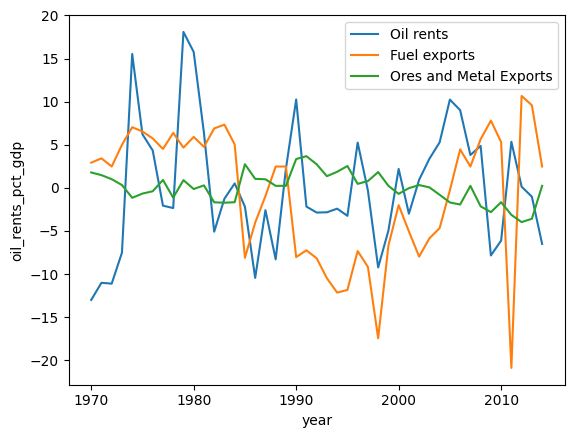

In [58]:
from cProfile import label


df_p6 = df_proper_6.toPandas()

sns.lineplot(x=df_p6["year"],y=df_p6["oil_rents_pct_gdp"],label="Oil rents")
sns.lineplot(x=df_p6["year"],y=df_p6["fuel_exports_pct_merch_exports"],label="Fuel exports")
sns.lineplot(x=df_p6["year"],y=df_p6["ores_and_metals_exports_pct_merch_exports"],label="Ores and Metal Exports")

In [65]:
df_proper_3.show()

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+------------------+-------------------------------------+---------------------+--------------------------------+--------------------+-------------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|gdp_current_per_billion_usd|gdp_growth_pct|oil_rents_lag_diff|total_natural_resource_rents_lag_diff|fuel_exports_lag_diff|ores_and_metals_exports_lag_diff|gdp_current_lag_diff|gdp_growth_lag_diff|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+------------------+-------------------------------------+---------------------+--------------------------------+----------

In [86]:
df_proper_3.show()

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+------------------+-------------------------------------+---------------------+--------------------------------+--------------------+-------------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|gdp_current_per_billion_usd|gdp_growth_pct|oil_rents_lag_diff|total_natural_resource_rents_lag_diff|fuel_exports_lag_diff|ores_and_metals_exports_lag_diff|gdp_current_lag_diff|gdp_growth_lag_diff|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+------------------+-------------------------------------+---------------------+--------------------------------+----------

In [104]:
mean_val = df_proper_3.agg(mean(col("oil_rents_pct_gdp"))).first()[0]
std_val = df_proper_3.agg(std(col("oil_rents_pct_gdp"))).first()[0]

df_proper_7 = df_proper_3.withColumn("oil_rents_z_score",
(col("oil_rents_pct_gdp")-mean_val)/std_val
)

oil_rents_outliers = df_proper_7.filter(abs(col("oil_rents_z_score"))>=2)

oil_rents_outliers.show()

years_1 = oil_rents_outliers.select("year").toPandas()["year"].to_numpy().tolist()
years_1

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+------------------+-------------------------------------+---------------------+--------------------------------+--------------------+-------------------+-----------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|gdp_current_per_billion_usd|gdp_growth_pct|oil_rents_lag_diff|total_natural_resource_rents_lag_diff|fuel_exports_lag_diff|ores_and_metals_exports_lag_diff|gdp_current_lag_diff|gdp_growth_lag_diff|oil_rents_z_score|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+------------------+-------------------------------------+---------------------+-------

[1974, 1979, 1980]

In [103]:
mean_val = df_proper_3.agg(mean(col("fuel_exports_pct_merch_exports"))).first()[0]
std_val = df_proper_3.agg(std(col("fuel_exports_pct_merch_exports"))).first()[0]

df_proper_7 = df_proper_3.withColumn("fuel_exports_z_score",
(col("fuel_exports_pct_merch_exports")-mean_val)/std_val
)

fuel_exports_outliers = df_proper_7.filter(abs(col("fuel_exports_z_score"))>=2)

years_2 = fuel_exports_outliers.select("year").toPandas()["year"].to_numpy().tolist()

fuel_exports_outliers.show()

years_2

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+------------------+-------------------------------------+---------------------+--------------------------------+--------------------+-------------------+--------------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|gdp_current_per_billion_usd|gdp_growth_pct|oil_rents_lag_diff|total_natural_resource_rents_lag_diff|fuel_exports_lag_diff|ores_and_metals_exports_lag_diff|gdp_current_lag_diff|gdp_growth_lag_diff|fuel_exports_z_score|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+------------------+-------------------------------------+---------------------+-

[1998, 2011]

In [105]:
mean_val = df_proper_3.agg(mean(col("ores_and_metals_exports_pct_merch_exports"))).first()[0]
std_val = df_proper_3.agg(std(col("ores_and_metals_exports_pct_merch_exports"))).first()[0]

df_proper_7 = df_proper_3.withColumn("ores_and_metals_exports_z_score",
(col("ores_and_metals_exports_pct_merch_exports")-mean_val)/std_val
)

ores_and_metals_exports_outliers = df_proper_7.filter(abs(col("ores_and_metals_exports_z_score"))>=2)

ores_and_metals_exports_outliers.show()

years_3 = ores_and_metals_exports_outliers.select("year").toPandas()["year"].to_numpy().tolist()
years_3

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+------------------+-------------------------------------+---------------------+--------------------------------+--------------------+-------------------+-------------------------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|gdp_current_per_billion_usd|gdp_growth_pct|oil_rents_lag_diff|total_natural_resource_rents_lag_diff|fuel_exports_lag_diff|ores_and_metals_exports_lag_diff|gdp_current_lag_diff|gdp_growth_lag_diff|ores_and_metals_exports_z_score|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+------------------+-------------------------------------+-

[1991, 2012, 2013]

In [108]:
years = years_1 + years_2 + years_3
print("The following are the outlier years:")
print(np.unique(years))
print("I used Z-score method. If the Z-score for each metric is greater than 2, they are outliers.")

The following are the outlier years:
[1974 1979 1980 1991 1998 2011 2012 2013]
I used Z-score method. If the Z-score for each metric is greater than 2, they are outliers.
